# Main Library 

In [1]:
# Reading Data And Visulization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Preprocessing & LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Building Model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# XGBoost
import xgboost as xgb

In [2]:
# Reading Data

data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\Medical Cost Personal Datasets\insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# information from data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Statistical From Data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


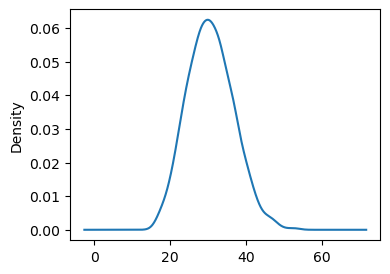

In [5]:
data["bmi"].plot(kind="density",figsize=(4, 3));

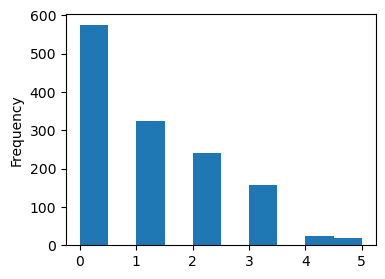

In [6]:
data["children"].plot(kind="hist",figsize=(4, 3));

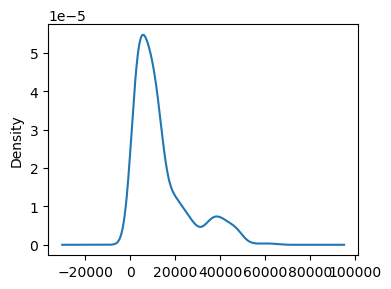

In [7]:
data["charges"].plot(kind="density",figsize=(4, 3));

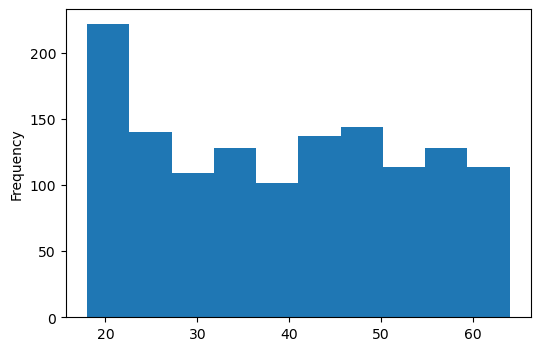

In [8]:
data["age"].plot(kind="hist",figsize=(6, 4));

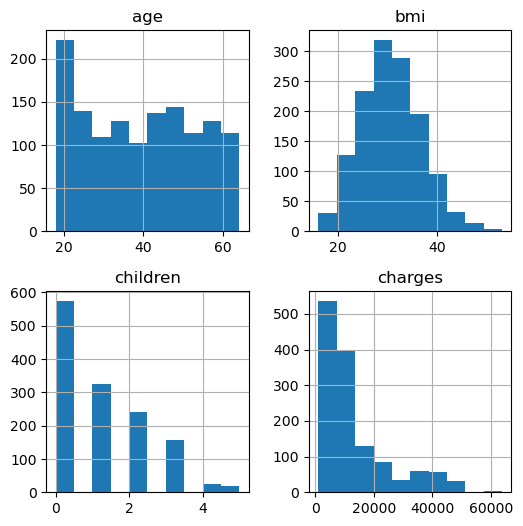

In [9]:
data.hist(figsize=(6, 6));

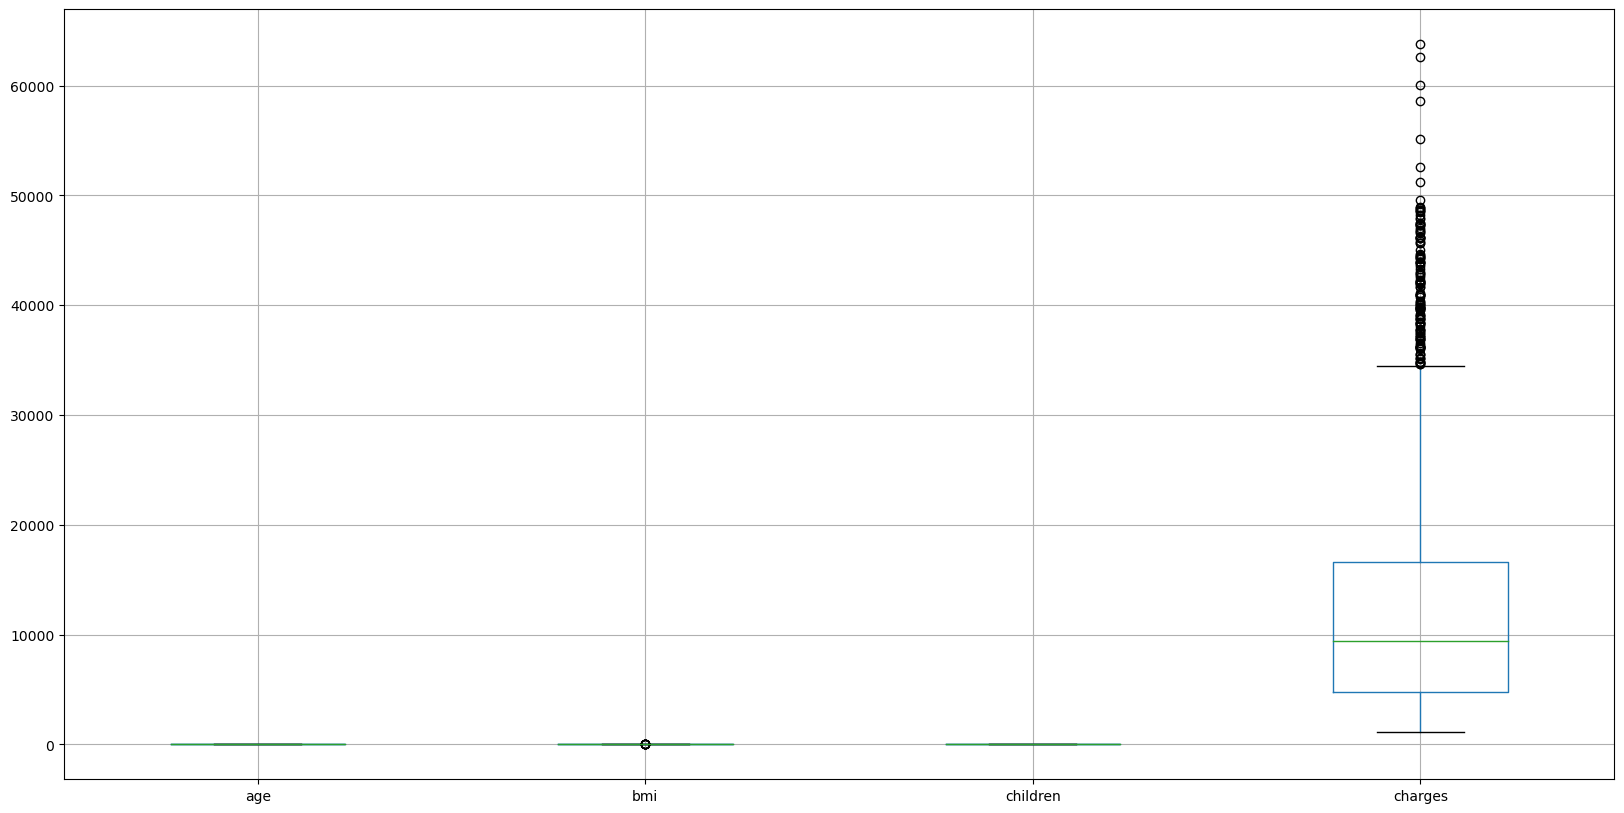

In [10]:
data.boxplot(figsize=(20, 10));

In [11]:
data[data["charges"] > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


#### Remove Data of columns == "Charges" > 50000 ==> This Outlier

In [23]:
data.drop(data[data["charges"] > 50000].index, axis=0, inplace=True)

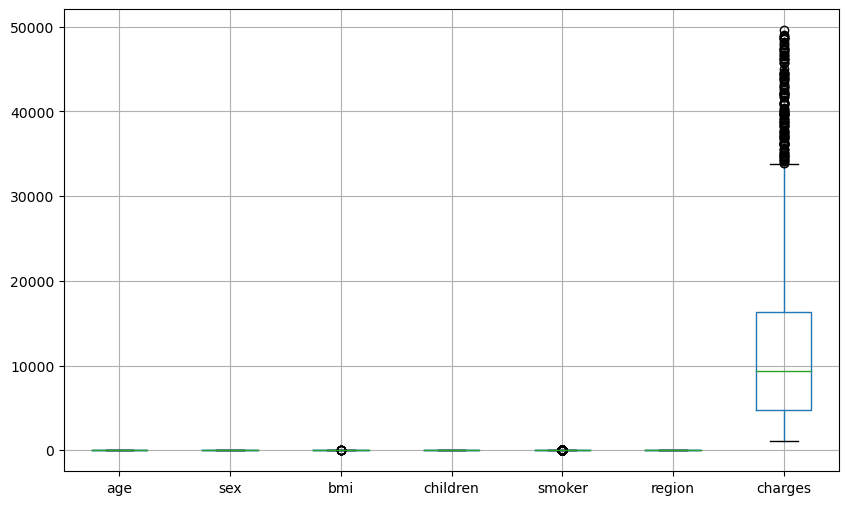

In [24]:
data.boxplot(figsize=(10, 6));

## Preprocessing & Encoder

In [25]:
columns = ["sex", "smoker", "region"]
La = LabelEncoder()
for col in columns:
    data[col] = La.fit_transform(data[col])
    
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   int64  
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   int64  
 5   region    1331 non-null   int64  
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.2 KB


In [27]:
X = data.drop(columns="charges", axis=1)
Y = data["charges"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# ==> Building Model

### Model 1 ==> Linear Regrerssion

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print("The Accuracy Score of Train ==> ", lin_reg.score(x_train, y_train))
print("The Accuracy Score of Test ==> ", lin_reg.score(x_test, y_test))

The Accuracy Score of Train ==>  0.7439673808976097
The Accuracy Score of Test ==>  0.7655682465617253


## Model 2 ==> Random Forest

In [30]:
model_RF = RandomForestRegressor(n_estimators=20, max_depth=20, max_features=3, min_samples_split=5, min_samples_leaf=5)
model_RF.fit(x_train, y_train)

print("The Accuracy Score of Train ==> ", model_RF.score(x_train, y_train))
print("The Accuracy Score of Test ==> ", model_RF.score(x_test, y_test))

The Accuracy Score of Train ==>  0.8948582011270438
The Accuracy Score of Test ==>  0.8656627350651525


## Model 3 ==> Adaboost

In [31]:
model_AD = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=200,
                                                                  min_samples_split=10,
                                                                  min_samples_leaf=10,
                                                                  max_features=5), 
                             n_estimators=2000,
                             learning_rate=0.0000001)

model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

The predict Score Train is ==> 0.898363390015568
%----------------------------------------------------------%
The predict Score Test is ==> 0.8757422097335299


## Model ==> XGBoost

In [32]:
model_xgb = xgb.XGBRegressor(n_estimators=900, max_depth=3,
                             learning_rate=0.01)
                             
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.8874480501277999
%----------------------------------------------------------%
The predict Score Test is ==> 0.8755678423610447


In [33]:
model_xgb1 = xgb.XGBRFRegressor(n_estimators=150, max_depth=5,
                               learning_rate=1)
                             
model_xgb1.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb1.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb1.score(x_test, y_test)}")

The predict Score Train is ==> 0.8793508911429637
%----------------------------------------------------------%
The predict Score Test is ==> 0.8764917639730659


# Building System Prediction

In [34]:
input_feature = np.asarray(list(map(float, input().split()))).reshape(1, -1)

prediction = model_xgb1.predict(input_feature)


print(f"The insurance is USD -=-=-> {prediction} ")

33	1	22.705	0	0	1
The insurance is USD -=-=-> [5659.158] 
